# The Movie DataBase 5000 Movie Dataset


Goal 1 : Visualize data from the csv file. [Tools: Pandas, Numpy, Matplotlib] [Lang: Python]

Goal 2 : Use TensorFlow to predict IMDB rating of a movie. [TensorFlow]

Goal 3 : Also several other statistical models of your choice to compare results with TensorFlow models. [Scikit-Learn]

Goal 4 : The goal of the exercise is to get the best movie rating prediction score. [Compare with Sun's R Prediction]

Extra 1 : Understand how to use Beautiful Soup - Download movie details, Posters

Extra 2 : Extraction from these metafiles to csv, Posters to files

Extra 3 : Face Detection on Posters - Count number of faces in each poster


In [43]:
import numpy as np #linear algebra
import pandas as pd #Data Processing

In [44]:
movie_data = pd.read_csv("/Users/gaddamnitish/Desktop/Rang/movie_metadata.csv", encoding='utf-8')
movie_data.head() #Print out the first 5 values

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [45]:
print(movie_data.columns.values) #print out all the column names

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


In [46]:
#movie_data.drop(['movie_imdb_link', 'imdb_score', 'aspect_ratio'], 1, inplace=True) #Don't drop these values if u wanna use them in your analysis 
print(movie_data.columns.values) #These are the new file columns

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


In [47]:
film_cols = ['movie_title', 'director_name', 'genres', 'language']
movie_data[film_cols].head() #Pulling out only the movie columns I like

,movie_title,director_name,genres,language
0,Avatar,James Cameron,Action|Adventure|Fantasy|Sci-Fi,English
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Action|Adventure|Fantasy,English
2,Spectre,Sam Mendes,Action|Adventure|Thriller,English
3,The Dark Knight Rises,Christopher Nolan,Action|Thriller,English
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,Documentary,NaN


In [48]:
#movie_data['movie_title'].where(movie_data['movie_title'] == 'Inferno')
movie_data[movie_data['movie_title'] == 'Inferno']  # why isn't this working?? It's returing an empty list  

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes


In [49]:
print('numeric_features')
#numeric_features=mov._get_numeric_data().columns.values.tolist()
numeric_features_1 = movie_data._get_numeric_data()
#numeric_features = numeric_features_1.values.tolist()
numeric_features = numeric_features_1.columns.values.tolist()
print(numeric_features)
print('------------------------------------------------------------------------------------------------------------')
print('text_features')
text_features=movie_data.columns.values.tolist()
#text_features = movie_data.values.tolist()
#text_features=[i for i in text_features if i not in numeric_features]
print(text_features)
print('------------------------------------------------------------------------------------------------------------')
print('string_features')
string_features=["movie_title", "plot_keywords"]
print(string_features)
print('------------------------------------------------------------------------------------------------------------')
print('categorical_features')
categorical_features=[i for i in text_features if i not in string_features]
numeric_features.remove("title_year") 
categorical_features.append("title_year")
print(categorical_features)

numeric_features
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
------------------------------------------------------------------------------------------------------------
text_features
['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
------------------------------

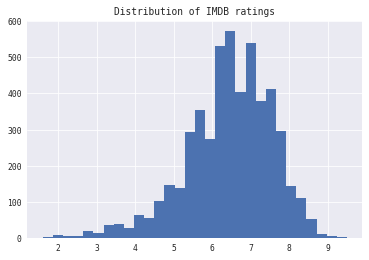

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
labels = movie_data['imdb_score']
#font = {'fontname' = 'Arial', 'size' = 14}
#title_font = {'weight' = 'Bold', 'size' = 18}
#plt.rc('font',family='Times New Roman')
#font = {'fontname':'Arial', 'size':'14'}
#title_font = { 'weight' : 'bold','size':'12'}
plt.hist(labels, bins = 30)
plt.title('Distribution of IMDB ratings')
plt.show()

In [51]:
print(movie_data.isnull().sum()) #Checking number of null values in every column before imputation
#movie_data.describe()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [52]:
movie_data['imdb_score'] = movie_data['imdb_score'].round()
movie_data['cast_total_facebook_likes'].sort_values(ascending=False).head(10)


1902    656730
1223    303717
4704    283939
4592    263584
4409    261818
4045    170118
2939    140268
2269    137712
2385    120797
74      108016
Name: cast_total_facebook_likes, dtype: int64

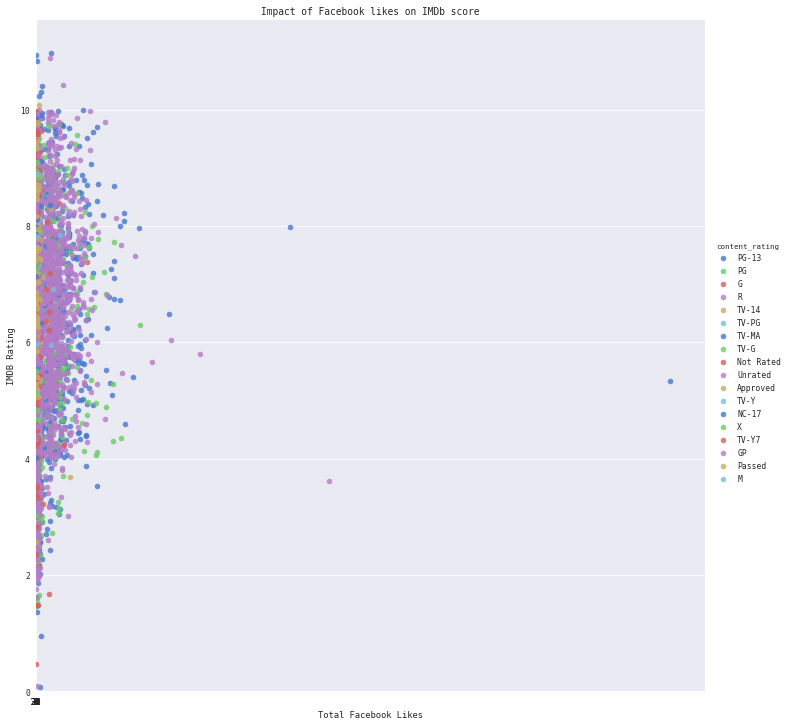

In [53]:
import seaborn as sns
#fig = plt.figure(figsize=(13, 5))
#t = np.arange(0.01, 20.0, 0.01)
#g = sns.lmplot('cast_total_facebook_likes', 'imdb_score',data=df,fit_reg=False,hue='content_rating',palette='muted',x_jitter=2.0,y_jitter=2.0,size=10)
#g.set(xlim=(0, None))
#g.set(ylim=(0, None))
#x_values = [10000,30000, 50000, 70000, 90000, 110000, 130000, 150000, 170000, 190000]
#plt.xticks(x_values)
#plt.title('Impact of Facebook likes on IMDb score')
#plt.ylabel('IMDB Rating')
#plt.xlabel('Total Facebook Likes')
#plt.show()

fig = plt.figure(figsize= (13, 5))
t = np.arange(0.01, 20.0, 0.01)
#g = sns.lmplot()
g = sns.lmplot(x = 'cast_total_facebook_likes', y ='imdb_score', data = movie_data, fit_reg=False, hue='content_rating', palette='muted', x_jitter=2.0, y_jitter=2.0, size=10)
g.set(xlim=(0, None))
g.set(ylim = (0, None))
x_values = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]
plt.xticks(x_values)
plt.title('Impact of Facebook likes on IMDb score')
plt.ylabel('IMDB Rating')
plt.xlabel('Total Facebook Likes')
plt.show()           

In [54]:
#Numeric features : imputation and scaling
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
movie_data[numeric_features] = imp.fit_transform(movie_data[numeric_features])

# we use standard scaler to keep as much variance as possible (compared to minmax)
scl = StandardScaler()
movie_data[numeric_features] = scl.fit_transform(movie_data[numeric_features])
movie_data[numeric_features].head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.797503,2.814318,-0.241367,0.125431,-0.369902,11.160073,5.795674,-0.267871,-0.679747,7.369256,1.016877,-0.176884,1.336845,-0.335116,1.318632
1,1.340129,2.456819,-0.039256,0.212714,2.228319,4.168026,2.798784,2.128121,-0.679747,2.559467,1.338521,0.829814,0.480211,0.090444,-0.389572
2,3.803816,1.622653,-0.241367,-0.292328,0.296309,2.473418,1.388010,0.110172,-0.182725,1.913218,1.057721,-0.311391,0.480211,0.090444,4.010348
3,5.536609,2.258208,7.656405,13.455777,1.362246,6.318278,7.659834,5.344122,-0.679747,6.434314,1.083248,5.288616,1.336845,0.090444,8.099687
4,-1.131770,-0.681231,-0.194340,0.212714,-0.427796,-0.581219,-0.604169,-0.526157,-0.679747,-0.716805,-0.091008,-0.405769,0.480211,0.090444,-0.389572


In [55]:
#Correlation of numeric features with IMDB score
import operator
from scipy.stats import pearsonr
correl = {}
for f in numeric_features:
    correl[f] = pearsonr(movie_data[f], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse = True)
print(sorted_cor)

[('imdb_score', (1.0, 0.0)), ('num_voted_users', (0.39714790821624651, 3.5969263687836996e-190)), ('num_critic_for_reviews', (0.29403942971462216, 3.9460230122521006e-101)), ('num_user_for_reviews', (0.28567588463703453, 2.5287001104683674e-95)), ('duration', (0.2546470160257871, 1.8008706429246286e-75)), ('movie_facebook_likes', (0.23962342890752247, 8.6999028812697546e-67)), ('gross', (0.17485030172710855, 6.5624012891452767e-36)), ('director_facebook_likes', (0.15448474459549114, 2.6144755163165799e-28)), ('cast_total_facebook_likes', (0.082355196206818679, 4.7164442539180973e-09)), ('actor_2_facebook_likes', (0.078797262074382632, 2.1062284420749718e-08)), ('actor_1_facebook_likes', (0.073454011909033348, 1.7697104534320087e-07)), ('aspect_ratio', (0.056917633407002288, 5.249533093813435e-05)), ('actor_3_facebook_likes', (0.049707029473017271, 0.00041366803793142461)), ('budget', (0.027103133123300677, 0.054281855665897952)), ('facenumber_in_poster', (-0.055442210012136249, 8.17429

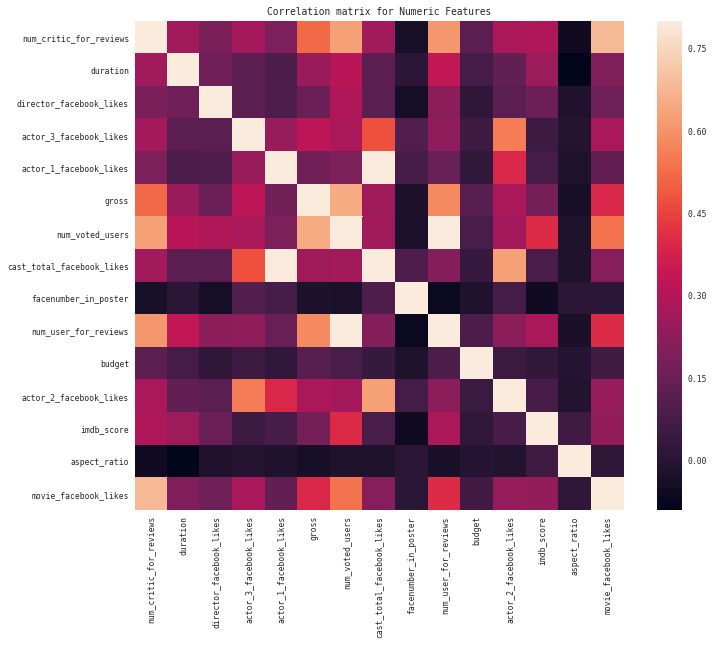

In [56]:
#Correlation between Numeric Features
import seaborn as sns #Seaborn builds on top of Matplotlib and introduces additional plot types.
#sns.set_context("notebook", font_scale=1.1)
#sns.set_style("ticks")

def corrmap(features, title):
    sns.set(context = 'paper', font = 'monospace')
    corrmatrix = movie_data[features].corr()
    f, ax = plt.subplots(figsize= (12, 9))
    plt.title(title) #Draw the heat map using SeaBorn.
    sns.heatmap(corrmatrix, vmax=.8, square = True)
corrmap(numeric_features, 'Correlation matrix for Numeric Features')
#Shift+Tab gives you additional options

You can observe that 'num_voted_users' and 'num_user_for_reviews' have a strong correlation. This is beacause it is the sum of othwer sucess factors. So we just remove it and make 2 categories : actor_1_facebook_likes and other_actors_facebook_likes.

More over there is a big correlation between the num_voted users and the number of reviews from both critics and users, the gross and the movie_facebook_likes. So we take the mean of those as a new variable called movie_success

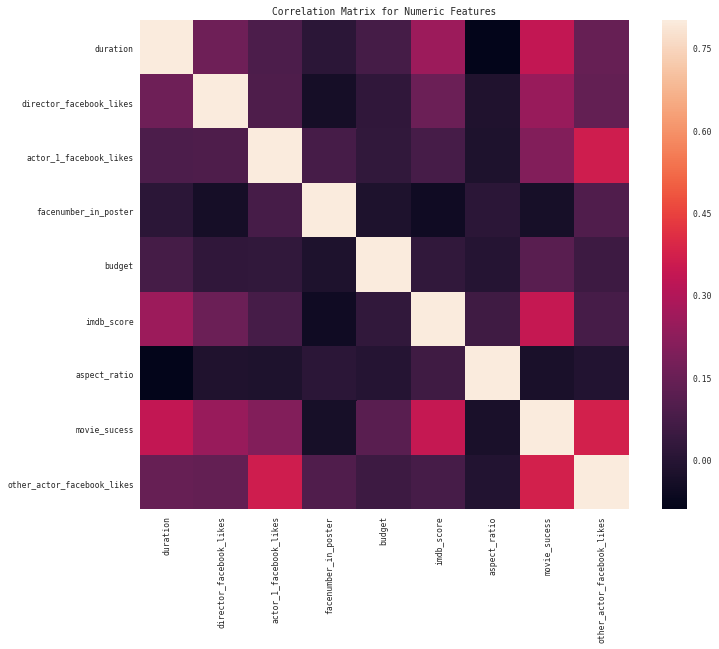

In [57]:
movie_data['movie_sucess'] = (movie_data['num_critic_for_reviews']+ movie_data['num_voted_users']+
                              movie_data['num_user_for_reviews']+movie_data['gross']+movie_data['movie_facebook_likes'])/6
movie_data['other_actor_facebook_likes'] = movie_data['actor_2_facebook_likes'] + movie_data['actor_3_facebook_likes']

num_features_2 = [x for x in numeric_features if x not in ["cast_total_facebook_likes", 'num_critic_for_reviews', 
                                                           "num_voted_users", "num_user_for_reviews", "gross",
                                                           "movie_facebook_likes", "actor_2_facebook_likes", 
                                                           "actor_3_facebook_likes"]]
num_features_2.extend(['movie_sucess', 'other_actor_facebook_likes'])

corrmap(num_features_2, "Correlation Matrix for Numeric Features")

In [58]:
import operator
from scipy.stats import pearsonr
correl = {}
for f in num_features_2:
    correl[f] = pearsonr(movie_data[f], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse = True)
print(sorted_cor)

[('imdb_score', (1.0, 0.0)), ('movie_sucess', (0.34139349781437195, 7.3963435923134018e-138)), ('duration', (0.2546470160257871, 1.8008706429246286e-75)), ('director_facebook_likes', (0.15448474459549114, 2.6144755163165799e-28)), ('actor_1_facebook_likes', (0.073454011909033348, 1.7697104534320087e-07)), ('other_actor_facebook_likes', (0.072769138019995627, 2.301039454447703e-07)), ('aspect_ratio', (0.056917633407002288, 5.249533093813435e-05)), ('budget', (0.027103133123300677, 0.054281855665897952)), ('facenumber_in_poster', (-0.055442210012136249, 8.1742990582205758e-05))]


In [59]:
from sklearn.ensemble import RandomForestRegressor # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.
RFR = RandomForestRegressor(max_features="sqrt") # [max_features] is the size of the random subsets of features to consider when splitting a node.
parameters = { "max_depth": [5, 8, 25], "min_samples_split": [1.0, 2, 5], "n_estimators": [800, 1200]}
print(RFR.get_params())
#print(RFR.get_params().keys())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [60]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RFR, parameters)
#clf.fit(movie_data[num_features_2], labels=None)
clf.fit(movie_data[num_features_2], labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 8, 25], 'min_samples_split': [1.0, 2, 5], 'n_estimators': [800, 1200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
print(clf.cv_results_)
#print(clf.grid_scores_)
#print(clf.cv_results_['params'])
#'mean_fit_time''std_fit_time' 'mean_score_time' 'std_score_time' 'param_max_depth' 'param_min_samples_split' 'param_n_estimators'

{'mean_fit_time': array([ 0.66395068,  1.03128862,  2.00518807,  2.64873505,  1.72089124,
        2.57207306,  0.69794321,  0.85835123,  1.84334079,  2.75346367,
        1.81481767,  2.77457174,  0.57283298,  0.8429176 ,  1.96761203,
        3.05857698,  2.21741136,  3.21273168]), 'std_fit_time': array([ 0.07481612,  0.11622925,  0.18122674,  0.04940578,  0.07443864,
        0.13983014,  0.07628603,  0.01698764,  0.02993793,  0.04503559,
        0.04460918,  0.05509387,  0.0144473 ,  0.00127767,  0.04224991,
        0.09139793,  0.15514393,  0.06062432]), 'mean_score_time': array([ 0.02664431,  0.05110749,  0.0719533 ,  0.14465563,  0.07428741,
        0.09912014,  0.0357635 ,  0.03830814,  0.07251795,  0.11049827,
        0.07170908,  0.11932619,  0.02636059,  0.03821476,  0.09378465,
        0.13576833,  0.08504232,  0.13910031]), 'std_score_time': array([ 0.00151106,  0.00929374,  0.01565998,  0.03453378,  0.01211242,
        0.01857023,  0.00385032,  0.00032126,  0.00111978,  0.001

In [62]:


from operator import itemgetter
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
        
report(clf.grid_scores_)

#print(clf.cv_results_)

Rank: 1
Mean validation score: 0.988 (std: 0.001)
Parameters: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 800}

Rank: 2
Mean validation score: 0.988 (std: 0.001)
Parameters: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 1200}

Rank: 3
Mean validation score: 0.988 (std: 0.002)
Parameters: {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 800}



/Users/gaddamnitish/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


##Training

In [63]:
#my_classifiers = list(movie_data['director_facebook_likes'], movie_data['actor_1_facebook_likes'], movie_data['actor_2_facebook_likes'], movie_data['actor_3_facebook_likes'])
#print(my_classifiers)
